In [260]:
#Data Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preprocessing and Feature Engineering
from textblob import TextBlob
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

#Model Selection and Validation
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
import numpy as np

In [206]:
# https://towardsdatascience.com/twitter-sentiment-analysis-classification-using-nltk-python-fa912578614c

In [184]:
df = pd.read_csv('train.csv', na_values='Not Available')

In [185]:
df.head() 

,Id,Category,Tweet
0,635769805279248384,negative,NaN
1,635930169241374720,neutral,IOS 9 App Transport Security. Mm need to check...
2,635950258682523648,neutral,"Mar if you have an iOS device, you should down..."
3,636030803433009153,negative,@jimmie_vanagon my phone does not run on lates...
4,636100906224848896,positive,Not sure how to start your publication on iOS?...


In [186]:
df.shape

(5970, 3)

In [187]:
df['Id'][0]

'635769805279248384'

In [188]:
df.Category[0]

'negative'

In [189]:
df.head()

,Id,Category,Tweet
0,635769805279248384,negative,NaN
1,635930169241374720,neutral,IOS 9 App Transport Security. Mm need to check...
2,635950258682523648,neutral,"Mar if you have an iOS device, you should down..."
3,636030803433009153,negative,@jimmie_vanagon my phone does not run on lates...
4,636100906224848896,positive,Not sure how to start your publication on iOS?...


In [190]:
labelMap = {"positive": 0, "neutral": 1, "negative": 2}

In [191]:
df.loc[:, 'Label'] = df.Category

In [192]:
df = df.replace({"Label": labelMap})

In [193]:
df[5928:5931]

,Id,Category,Tweet,Label
5928,629344022163755008,neutral,@MrTransferNewss @FootbaIISources considering ...,1
5929,Id,Tweet,Category,Tweet
5930,629786702052241408,neutral,Zlatan's 20th goal of the season not enough fo...,1


In [194]:
df.head()

,Id,Category,Tweet,Label
0,635769805279248384,negative,NaN,2
1,635930169241374720,neutral,IOS 9 App Transport Security. Mm need to check...,1
2,635950258682523648,neutral,"Mar if you have an iOS device, you should down...",1
3,636030803433009153,negative,@jimmie_vanagon my phone does not run on lates...,2
4,636100906224848896,positive,Not sure how to start your publication on iOS?...,0


In [195]:
df = df[~(df.Label=="Tweet")]
df
# 5929th row was broken, it contained: Id	Tweet	Category 

,Id,Category,Tweet,Label
0,635769805279248384,negative,NaN,2
1,635930169241374720,neutral,IOS 9 App Transport Security. Mm need to check...,1
2,635950258682523648,neutral,"Mar if you have an iOS device, you should down...",1
3,636030803433009153,negative,@jimmie_vanagon my phone does not run on lates...,2
4,636100906224848896,positive,Not sure how to start your publication on iOS?...,0
...,...,...,...,...
5965,639016598477651968,neutral,@YouAreMyArsenal Wouldn't surprise me if we en...,1
5966,640276909633486849,neutral,Rib injury for Zlatan against Russia is a big ...,1
5967,640296841725235200,neutral,Noooooo! I was hoping to see Zlatan being Zlat...,1
5968,641017384908779520,neutral,NaN,1


In [196]:
df.index[(df.Label=="Tweet")].tolist()

[]

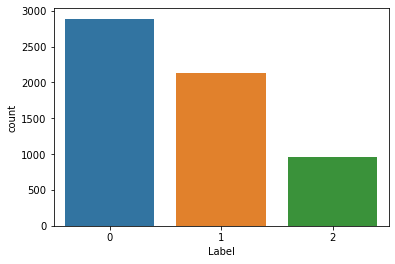

In [197]:
sns.countplot(x= 'Label', data = df)

In [198]:
df_NaN = df[(pd.isna(df.Tweet))]
df_NaN.head()

,Id,Category,Tweet,Label
0,635769805279248384,negative,NaN,2
57,639289589396541440,positive,NaN,0
61,639586654492205056,neutral,NaN,1
71,640324452731875328,positive,NaN,0
72,640329967826440192,positive,NaN,0


In [199]:
len(df)

5969

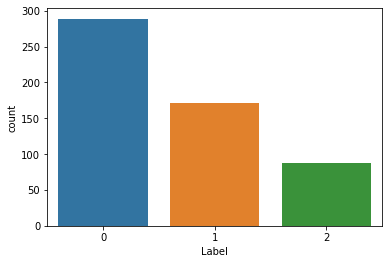

In [200]:
sns.countplot(x= 'Label',data = df_NaN)

In [207]:
df = df[~(pd.isna(df.Tweet))]
df.head()

,Id,Category,Tweet,Label
1,635930169241374720,neutral,IOS 9 App Transport Security. Mm need to check...,1
2,635950258682523648,neutral,"Mar if you have an iOS device, you should down...",1
3,636030803433009153,negative,@jimmie_vanagon my phone does not run on lates...,2
4,636100906224848896,positive,Not sure how to start your publication on iOS?...,0
5,636176272947744772,neutral,"Two Dollar Tuesday is here with Forklift 2, Qu...",1


In [208]:
X_train, X_test, y_train, y_test = train_test_split(df['Tweet'], df['Label'], test_size=0.3)

In [272]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [274]:
y_test.head()

2138    0
5483    1
1325    0
3386    1
5064    1
Name: Label, dtype: int32

In [217]:
X_train.head()

5357    Great to hear you on BBC5Live on Wednesday. Ne...
2137    so I just found out today that I might get to ...
3356    @Schultz975 Steve Sarkisian was about drunkard...
4849    Former world No 1 Tiger Woods blamed his putti...
5504    Just watching "Valentine's Day" while drinking...
Name: Tweet, dtype: object

In [218]:
def form_sentence(tweet):
    tweet_blob = TextBlob(tweet)
    return ' '.join(tweet_blob.words)

print(form_sentence(X_train.iloc[0]))
print(X_train.iloc[0])

Great to hear you on BBC5Live on Wednesday Nearly fell off my chair at UKIP inclusion bbcbias https t.co/tOmghdaUGB
Great to hear you on BBC5Live on Wednesday. Nearly fell off my chair at UKIP inclusion #bbcbias https://t.co/tOmghdaUGB


In [238]:
def no_user_alpha(tweet):
    tweet_list = [ele for ele in tweet.split() if ele != 'user']
    clean_tokens = [t for t in tweet_list if re.match(r'[^\W\d]*$', t)]
    clean_s = ' '.join(clean_tokens)
    clean_mess = [word for word in clean_s.split() if word.lower() not in stopwords.words('english')]
    return clean_mess
print(no_user_alpha(form_sentence(X_train.iloc[0])))
print(X_train.iloc[0])
example = no_user_alpha(form_sentence(X_train.iloc[0]))

['Great', 'hear', 'Wednesday', 'Nearly', 'fell', 'chair', 'UKIP', 'inclusion', 'bbcbias', 'https']
Great to hear you on BBC5Live on Wednesday. Nearly fell off my chair at UKIP inclusion #bbcbias https://t.co/tOmghdaUGB


In [279]:
def normalization(tweet_list):
        lem = WordNetLemmatizer()
        normalized_tweet = []
        for word in tweet_list:
            normalized_text = lem.lemmatize(word,'v')
            normalized_tweet.append(normalized_text)
        return normalized_tweet
    
tweet_list = 'I was playing with my friends adjustable was with whom I used to play, when you called me yesterday'.split()
print(normalization(example))
print(normalization(tweet_list))

['Great', 'hear', 'Wednesday', 'Nearly', 'fell', 'chair', 'UKIP', 'inclusion', 'bbcbias', 'https']
['I', 'be', 'play', 'with', 'my', 'friends', 'adjustable', 'be', 'with', 'whom', 'I', 'use', 'to', 'play,', 'when', 'you', 'call', 'me', 'yesterday']


In [278]:
def text_processing(tweet):
    #Generating the list of words in the tweet (hastags and other punctuations removed)
    def form_sentence(tweet):
        tweet_blob = TextBlob(tweet)
        return ' '.join(tweet_blob.words)
    new_tweet = form_sentence(tweet)
    
    #Removing stopwords and words with unusual symbols
    def no_user_alpha(tweet):
        tweet_list = [ele for ele in tweet.split() if ele != 'user']
        clean_tokens = [t for t in tweet_list if re.match(r'[^\W\d]*$', t)]
        clean_s = ' '.join(clean_tokens)
        clean_mess = [word for word in clean_s.split() if word.lower() not in stopwords.words('english')]
        return clean_mess
    no_punc_tweet = no_user_alpha(new_tweet)
    
    #Normalizing the words in tweets 
    def normalization(tweet_list):
        lem = WordNetLemmatizer()
        normalized_tweet = []
        for word in tweet_list:
            normalized_text = lem.lemmatize(word,'v')
            normalized_tweet.append(normalized_text)
        return normalized_tweet
    
    
    return normalization(no_punc_tweet)



In [244]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_processing)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [261]:
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)

In [262]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [271]:
y_test

2138    0
5483    1
1325    0
3386    1
5064    1
       ..
5615    1
2143    2
4007    1
3185    0
4700    0
Name: Label, Length: 1627, dtype: object

In [263]:
np.sum(y_test == predictions)/len(predictions)

0.56299938537185

In [275]:
print(accuracy_score(predictions,y_test))

0.56299938537185


In [277]:
print(classification_report(predictions, y_test))
print(confusion_matrix(predictions, y_test))

              precision    recall  f1-score   support

           0       0.92      0.58      0.71      1263
           1       0.32      0.50      0.39       364
           2       0.00      0.00      0.00         0

    accuracy                           0.56      1627
   macro avg       0.41      0.36      0.37      1627
weighted avg       0.79      0.56      0.64      1627

[[733 387 143]
 [ 64 183 117]
 [  0   0   0]]


C:\PROGRAMY\Anaconda\Anaconda3\envs\deeper\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
